In [1]:
from tcoasts import *
import numpy as np
import pylab as plt
import cartopy.crs as ccrs
%matplotlib inline

In [2]:
from dask.distributed import Client

In [3]:
c=Client()
c

Client Scheduler: tcp://127.0.0.1:32825 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 33.67 GB


In [4]:
folder='path2data/mitgcm/run/'

In [5]:
contourfile='./input_data/GoMCoastLine_nolagoon.xy'
distance=np.array([-450,-235,-90,-45,-15,0,15,45,90,235,450])
tac=tcoasts.TransportAlongCoast(folder,[-94,18],contourfile,distance=distance,length=50)

In [6]:
interp=tac.inter2vector(ufiles='U.*.nc',vfiles='V.*.nc',tracerfile='PTRACER01.*.nc')

/g/data1a/v45/jm5970/github/tcoasts/tcoasts/utils/decorators.py:11: Warning: Loading previous saved data.
  warnings.warn('Loading previous saved data.', Warning)


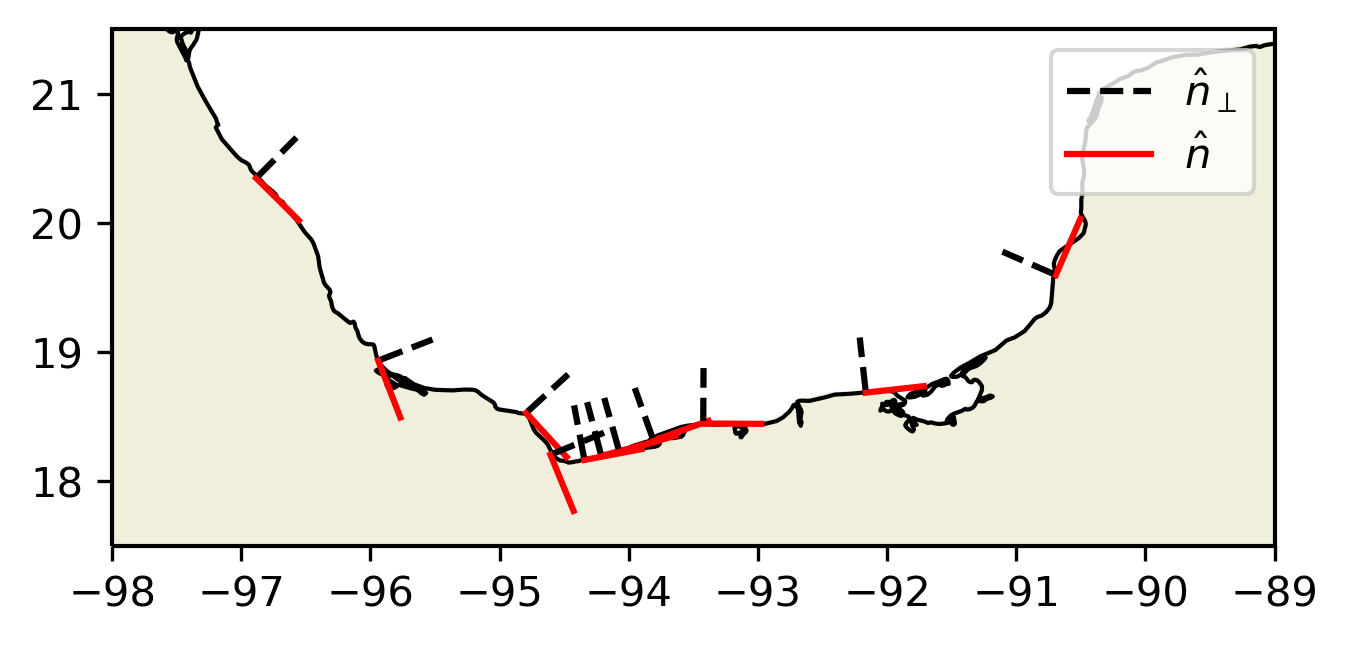

In [7]:
import cartopy.feature as cfeature

fig=plt.figure(figsize=(5, 5),dpi=300)

ax = plt.subplot(111, projection=ccrs.PlateCarree())

ax.set_extent([-98, -89.5, 17.5, 21.5])

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')


land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

ax.add_feature(land_50m)
ax.coastlines(resolution='10m')

x_norm,y_norm,x_perp,y_perp,x_perp_all,y_perp_all=tac.vertor_perp()
# Plot perpendicular vectors.
plt.plot(x_norm.T,y_norm.T,'-r')
plt.plot(x_perp.T,y_perp.T,'--k')

plt.plot(x_perp.T[0,0]*0,y_perp.T[0,0]*0,'--k',label='$\hat{n}_\perp$')
plt.plot(x_norm.T[0,0]*0,y_norm.T[0,0]*0,'-r',label='$\hat{n}$')

ax.set_xticks(np.arange(-98,-88), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(18,22), crs=ccrs.PlateCarree())

plt.legend()

In [8]:
transport=tac.compute_transport()

Text(0.5, 1.15, 'Total Transport')

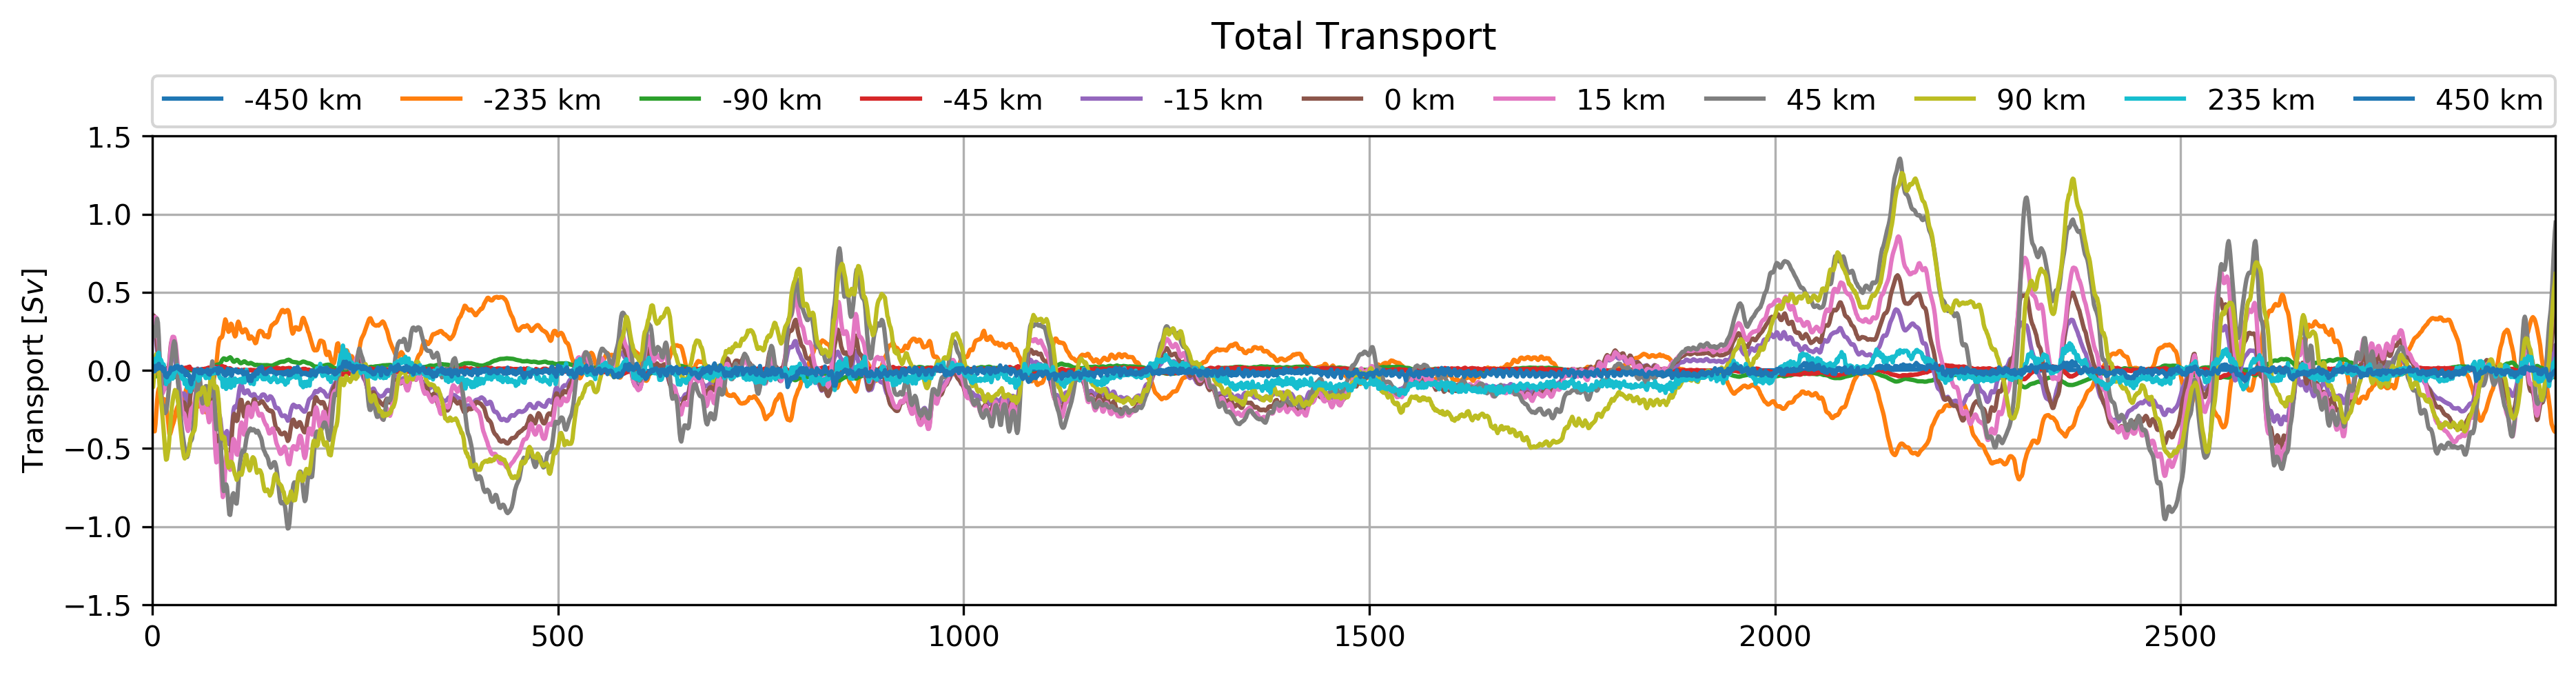

In [9]:
f,ax=plt.subplots(figsize=(15,3),dpi=300)
#(transport.sum(dim={'depth','n'})/1e6).plot.line(x='time',ax=ax,linewidth=1)

for ii in range(len(transport.transect)):
    ax.plot(transport.time,(transport/1e6).isel(transect=ii),label=str(distance[ii])+' km')

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=12, mode="expand", borderaxespad=0.)

plt.ylabel('Transport [$Sv$]')
plt.grid()
plt.xlim(transport.time[0].values,transport.time[-1].values)
plt.ylim(-1.5,1.5)
plt.title('Total Transport',y=1.15,fontsize=13)

(-0.02, 0.02)

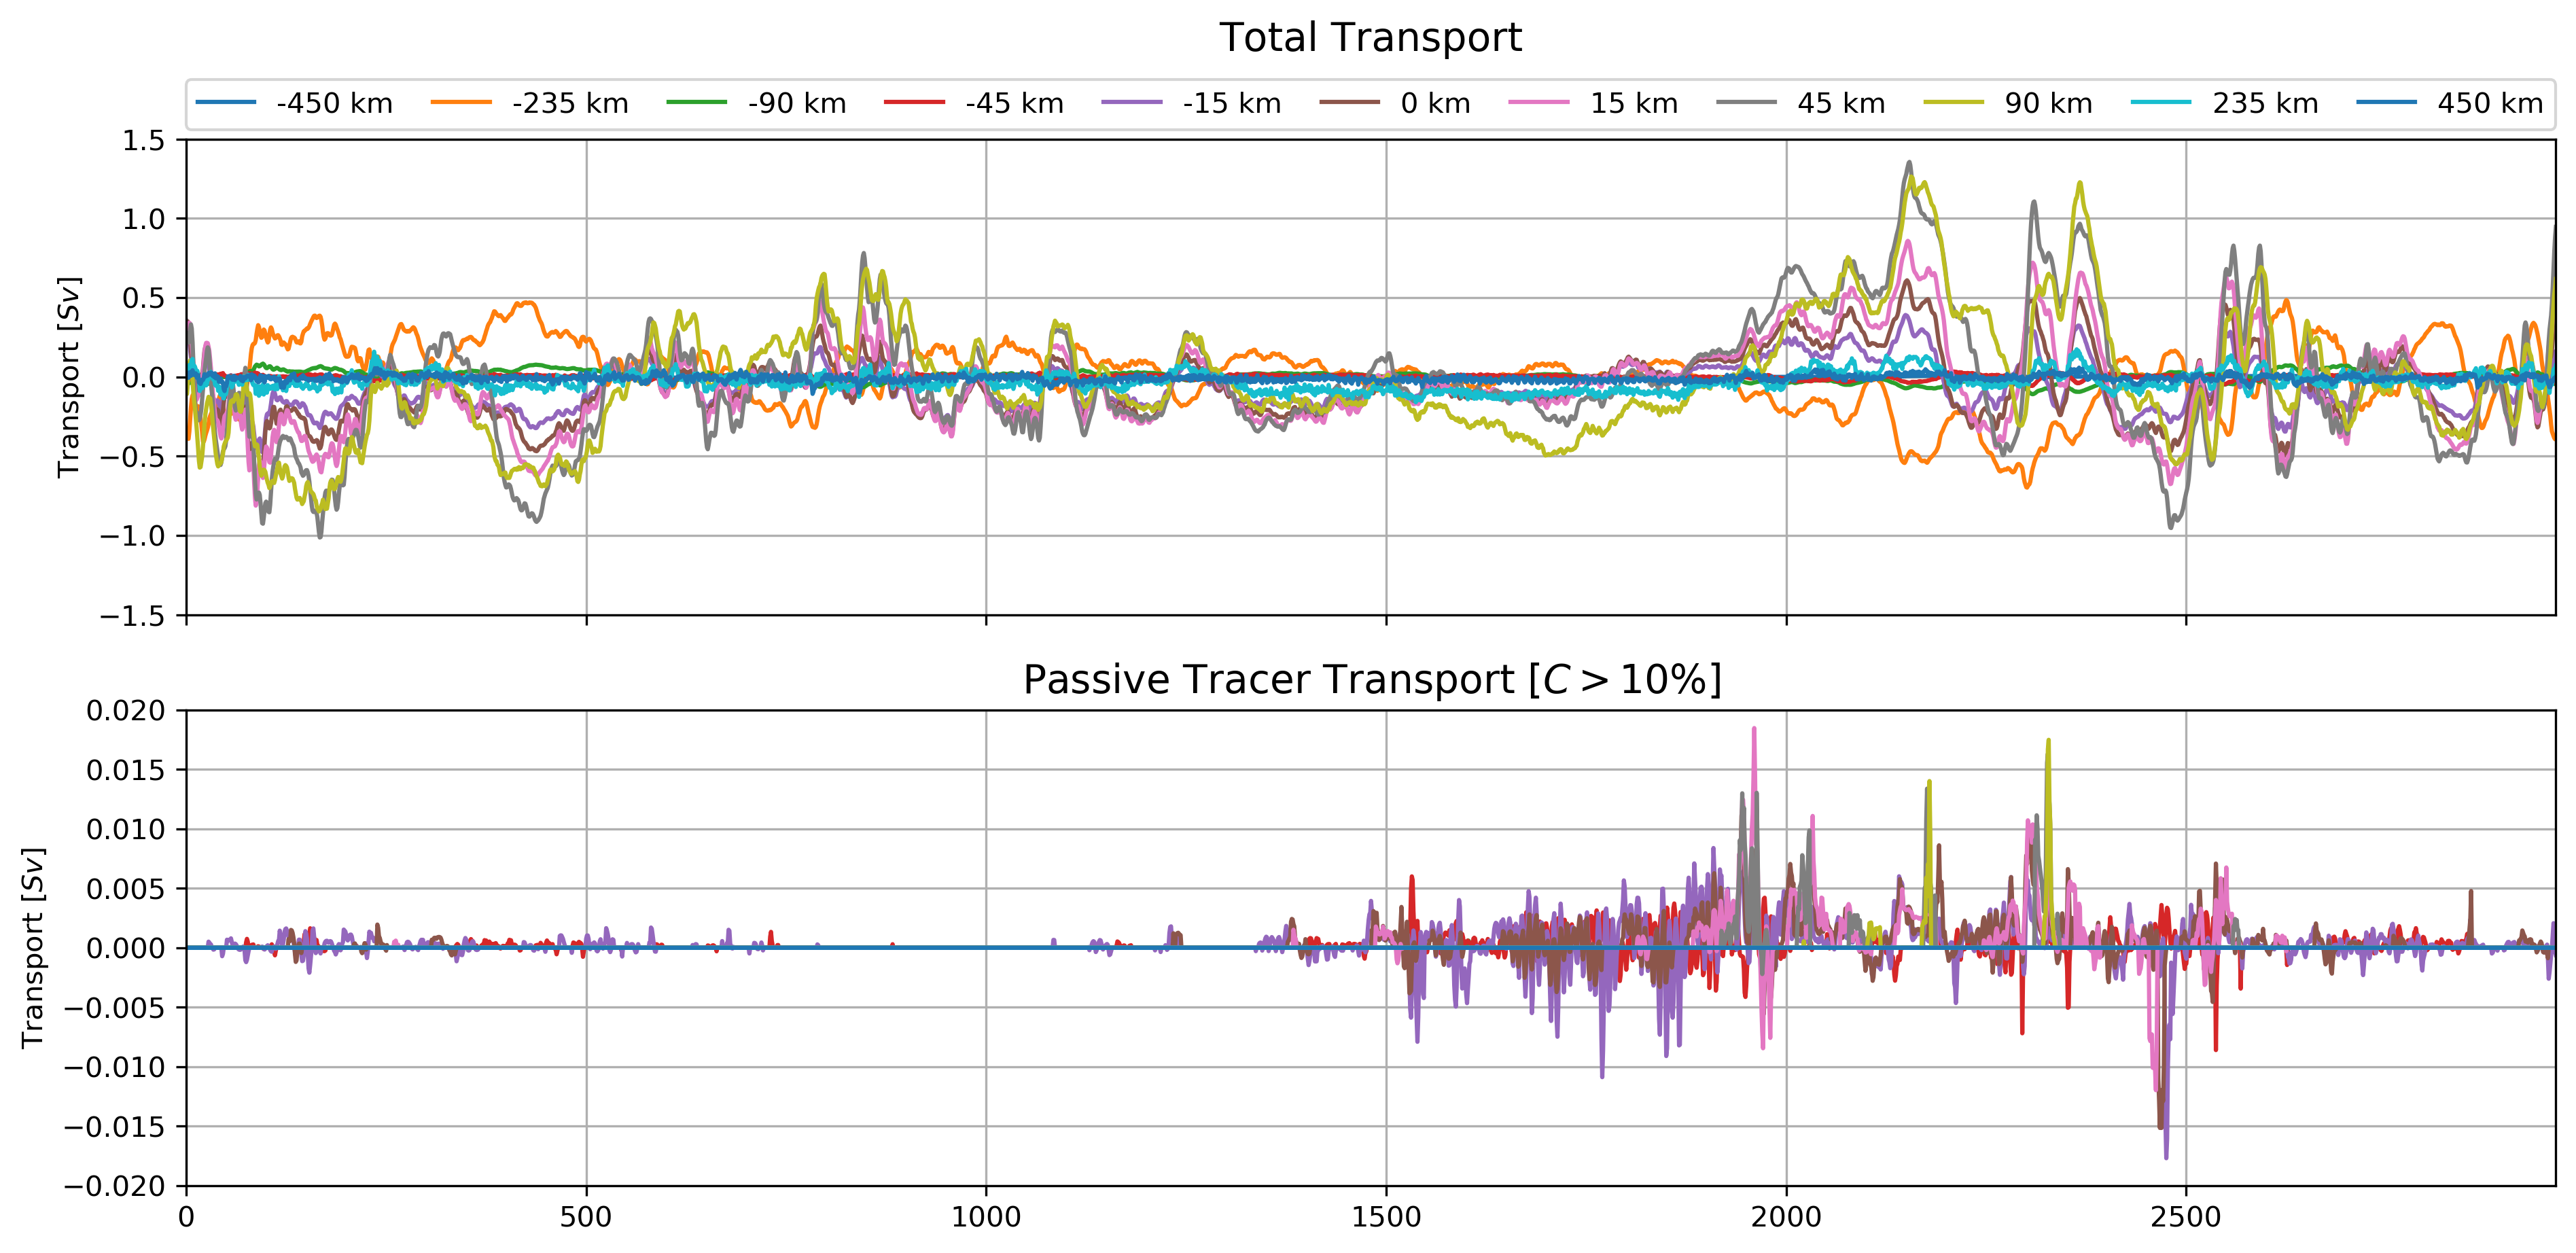

In [10]:
f,ax=plt.subplots(2,1,figsize=(15,6.8),dpi=300,sharex=True)

for ii in range(len(transport.transect)):
    ax[0].plot(transport.time,(transport/1e6).isel(transect=ii),label=str(distance[ii])+' km')

ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=12, mode="expand", borderaxespad=0.)

ax[0].set_ylabel('Transport [$Sv$]')
ax[0].grid()
ax[0].set_xlim(transport.time[0].values,transport.time[-1].values)
ax[0].set_ylim(-1.5,1.5)
ax[0].set_title('Total Transport',y=1.15,fontsize=14)

###########

scaled_transport=tac.mask_transport(0.1,method='greater')

for ii in range(len(scaled_transport.transect)):
    ax[1].plot(scaled_transport.time,(scaled_transport/1e6).isel(transect=ii),label=str(distance[ii])+' km')

ax[1].set_ylabel('Transport [$Sv$]')
ax[1].grid()
ax[1].set_xlim(transport.time[0].values,transport.time[-1].values)
ax[1].set_title('Passive Tracer Transport [$C > 10\%$]',fontsize=14)
ax[1].set_ylim(-0.02,0.02)